In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser

### Load data

In [6]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge/'
bdf_discharge = load_dir(foldername)

62  files in folder
62  files loaded


In [8]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge4/'
bdf_discharge2 = load_dir(foldername)

103  files in folder
103  files loaded


In [9]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge2/'
bdf_nospin = load_dir(foldername)

200  files in folder
200  files loaded


In [10]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge3/'
bdf_spin = load_dir(foldername)
bdf_spin = bdf_spin[10:] # in first 10 datasets the filed was off

220  files in folder
220  files loaded


In [6]:
foldername = r'/data/new_trap/20191107/Bead1/Discharge_spinning//'
bdf_spin_discharge = load_dir(foldername)

86  files in folder
86  files loaded


<IPython.core.display.Javascript object>


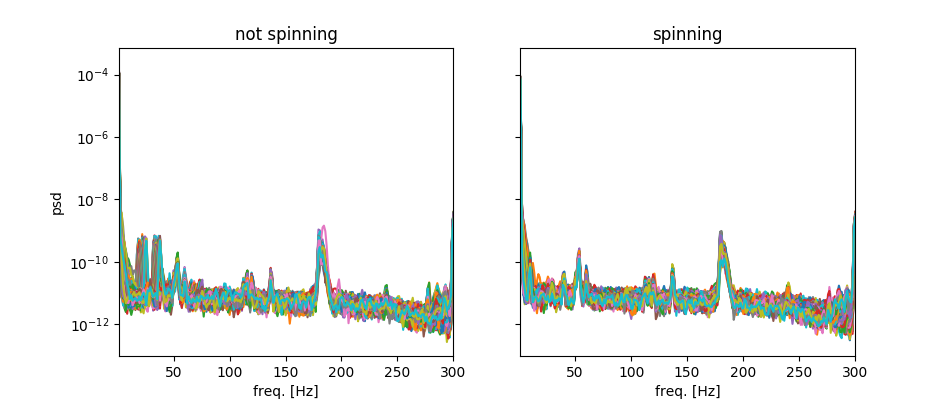

[(1, 300), Text(0.5, 0, 'freq. [Hz]'), Text(0.5, 1.0, 'spinning')]

In [19]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
[ax[0].semilogy(*bb.welch_psd('x')) for bb in bdf_nospin]
ax[0].set(xlim=(1,300), ylabel='psd', xlabel='freq. [Hz]', title='not spinning')
[ax[1].semilogy(*bb.welch_psd('x')) for bb in bdf_spin[:100]]
ax[1].set(xlim=(1,300), xlabel='freq. [Hz]', title='spinning')

### Fitting charged data

In [11]:
lc_i = likelihood_analyser.LikelihoodAnalyser()

In [7]:
response = [np.std(bdf_.response_at_freq2('x', drive_freq=151)) for bdf_ in bdf_spin_discharge]
response2 = [np.std(bdf_.response_at_freq3('x', drive_freq=151)) for bdf_ in bdf_spin_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


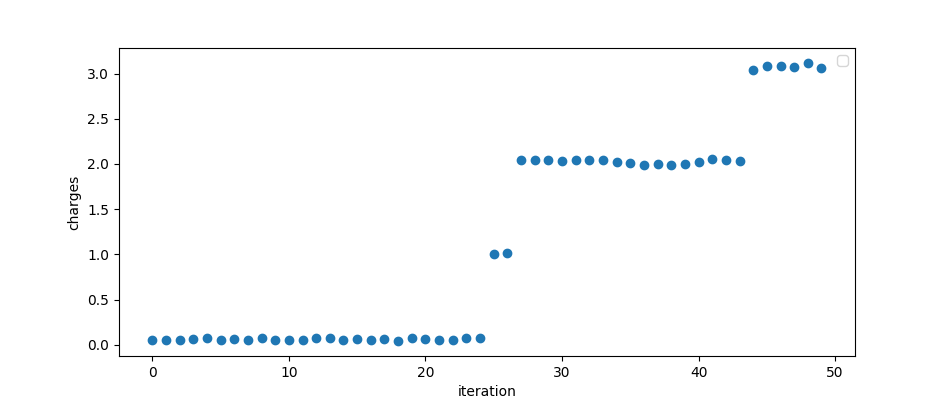

No handles with labels found to put in legend.


In [12]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(len(response)), response/response[40]*10, label='X2')
ax.scatter(range(len(response2[:50])), response2[:50]/response2[25])
ax.set(xlabel='iteration', ylabel='charges')
ax.legend()

Data overall time:  10.0  sec.
Bandpass filter ON. Bandwidth:  10 Hz
bandpass time:  0.0018720626831054688


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


minimization time:  0.42067813873291016
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  0.0E-4   |  2.2E-4   |            |            |    0    |   100   |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |  0.000E1  |  0.492E1  |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


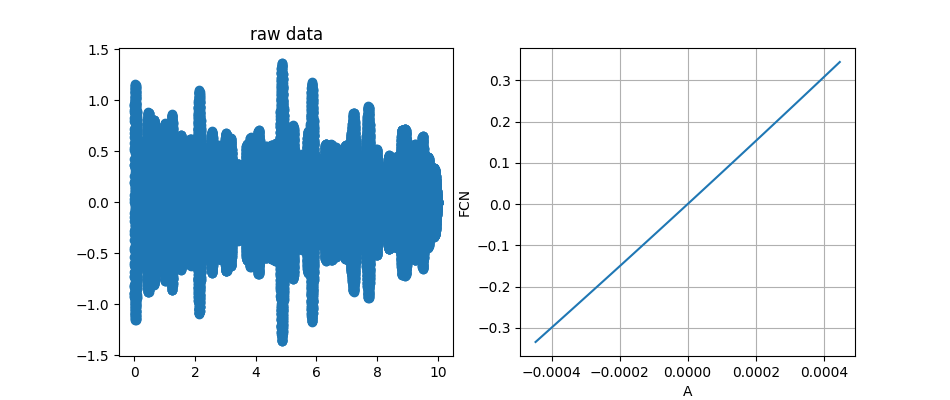

reduced chi2:  0.12285704269745018


/usr/local/lib/python3.6/dist-packages/iminuit/_minuit_methods.py:88: RuntimeWarning: band and text is requested but the bound is too narrow.
  warn(RuntimeWarning('band and text is requested but '


In [82]:
## x-pos data only
bdf_cal0 = bdf_discharge[60]
sig_x2 = bdf_cal0.x2*50000
sig_x3 = bdf_cal0.x3/3
freq = 151
fit_kwargs = {'A': 5, 'f': freq, 'phi': 1,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [0,100],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

empirical_rms = 1
m1 = lc_i.find_mle_sin(sig_x2, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=True,
                       suppress_print=False, **fit_kwargs)

In [13]:
m1_discharge = [lc_i.find_mle_sin(bdf_.x2*50000, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=False,
                       suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge]

NameError: name 'lc_i' is not defined

In [84]:
m1_discharge2 = [lc_i.find_mle_sin(bdf_.x2*50000, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=False,
                       suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge2]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


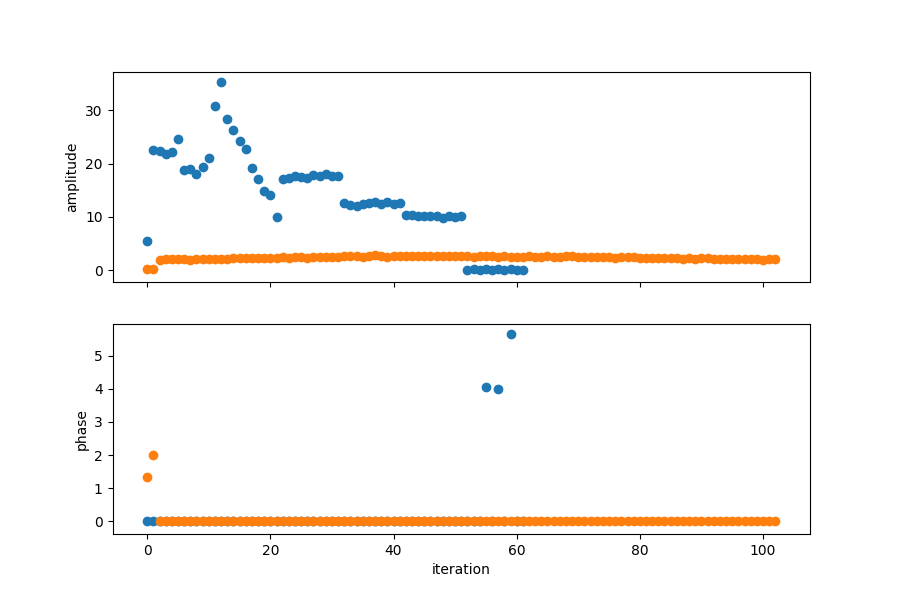

[Text(0, 0.5, 'phase'), Text(0.5, 0, 'iteration')]

In [126]:
amp_discharge = np.array([m1_.values[0] for m1_ in m1_discharge])
phase_discharge = np.array([m1_.values[2] for m1_ in m1_discharge])

amp_discharge2 = np.array([m1_.values[0] for m1_ in m1_discharge2])
phase_discharge2 = np.array([m1_.values[2] for m1_ in m1_discharge2])

_,ax = plt.subplots(2,1,figsize=(9,6), sharex=True)
ax[0].scatter(range(len(amp_discharge)),amp_discharge/amp_discharge2[-1]*2)
ax[0].scatter(range(len(amp_discharge2)),amp_discharge2/amp_discharge2[-1]*2)
ax[0].set(ylabel='amplitude')
ax[1].scatter(range(len(amp_discharge)), phase_discharge)
ax[1].scatter(range(len(amp_discharge2)), phase_discharge2)
ax[1].set(xlabel='iteration', ylabel='phase')

#### Two estimators for x

Data overall time:  10.0  sec.
Bandpass filter ON. Bandwidth:  10 Hz
bandpass time:  0.0023996829986572266


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


minimization time:  0.9339442253112793
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         |  12.891   |   0.006   |            |            |    0    |  1000   |       |
| 1 | A2        |   1.916   |   0.001   |            |            |         |         |       |
| 2 | f         |    151    |    10     |            |            |         |         |  yes  |
| 3 | f2        |    151    |    10     |            |            |         |         |  yes  |
| 4 | phi       | 0.000E-7  | 2.064E-7  |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


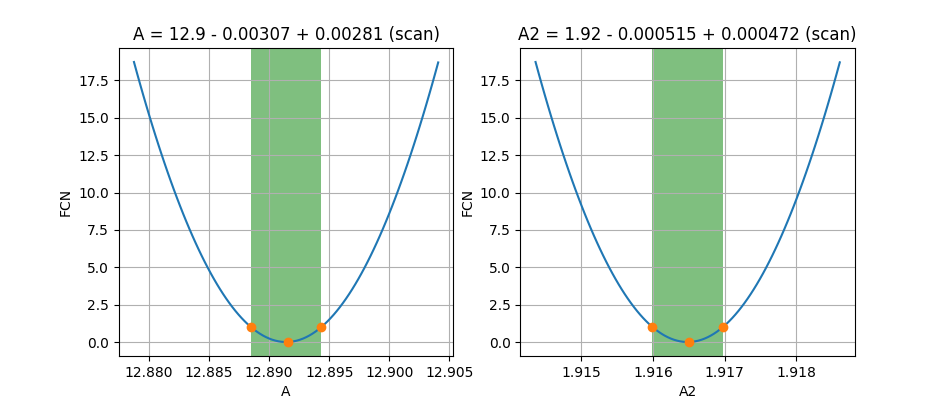

reduced chi2:  4.8603877705675815


In [86]:

bdf_cal0 = bdf_discharge[23]
sig_x2 = bdf_cal0.x2*50000
sig_x3 = bdf_cal0.x3/3

fit_kwargs = {'A': 10, 'f': freq, 'phi': 0, 'A2': 2, 'f2': freq, 'delta_phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [0,1000], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': False}

m1 = lc_i.find_mle_2sin(sig_x2, sig_x3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=True,
                        suppress_print=False, **fit_kwargs)

In [89]:
##two estimators: amplitude and phase
m2_discharge = [lc_i.find_mle_2sin(bdf_.x2*50000, bdf_.x3/3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, 
                                   plot=False, suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [92]:
##two estimators: amplitude and phase
m2_discharge2 = [lc_i.find_mle_2sin(bdf_.x2*50000, bdf_.x3/3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, 
                                   plot=False, suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge2]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


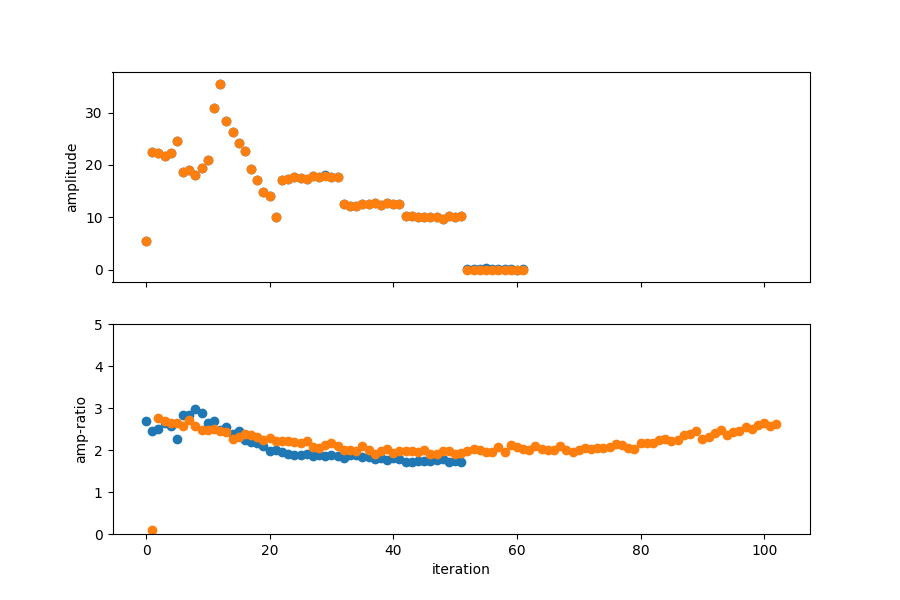

[(0, 5), Text(0, 0.5, 'amp-ratio'), Text(0.5, 0, 'iteration')]

In [101]:
amp2_discharge = np.array([m1_.values[0] for m1_ in m2_discharge])
ratio2_discharge = np.array([m1_.values[1] for m1_ in m2_discharge])

amp2_discharge2 = np.array([m1_.values[0] for m1_ in m2_discharge2])
ratio2_discharge2 = np.array([m1_.values[1] for m1_ in m2_discharge2])

_,ax = plt.subplots(2,1,figsize=(9,6), sharex=True)
ax[0].scatter(range(len(amp_discharge)),amp_discharge/amp_discharge2[-1]*2)
ax[0].scatter(range(len(amp2_discharge)),amp2_discharge/amp2_discharge2[-1]*2)
ax[0].set(ylabel='amplitude')
ax[1].scatter(range(len(ratio2_discharge)), ratio2_discharge)
ax[1].scatter(range(len(ratio2_discharge2)), ratio2_discharge2)
ax[1].set(xlabel='iteration', ylabel='amp-ratio', ylim=(0,5))

No cantilever data
Error loading spinning data
Data overall time:  10.0  sec.
Bandpass filter ON. Bandwidth:  6 Hz
bandpass time:  0.0034341812133789062


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


minimization time:  0.3632066249847412
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         |   0.875   |   0.003   |            |            |    0    |  1000   |       |
| 1 | A2        |    2.0    |    2.0    |            |            |         |         |  yes  |
| 2 | f         |    161    |    10     |            |            |         |         |  yes  |
| 3 | f2        |    161    |    10     |            |            |         |         |  yes  |
| 4 | phi       |    0.0    |    0.5    |            |            |    0    | 6.28319 |  yes  |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


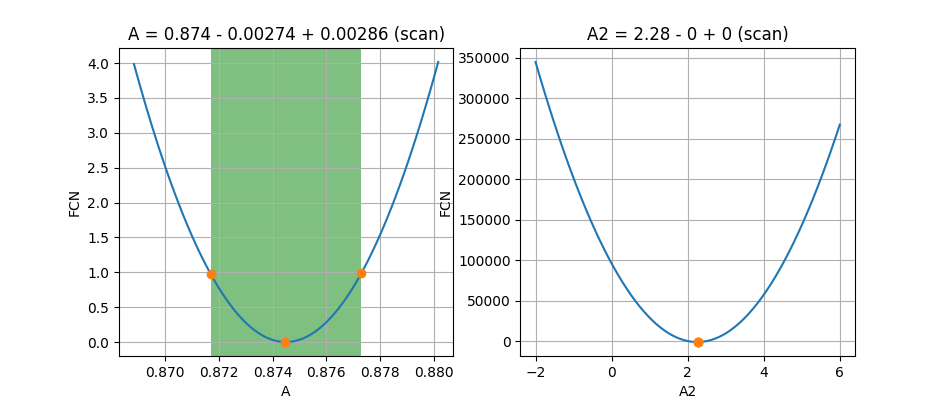

reduced chi2:  2.060022655848434


In [156]:
## fix phase and x3/x2 ratio
bdf_cal0 = bdf_discharge[34]
sig_x2 = bdf_cal0.x2*50000
sig_x3 = bdf_cal0.x3/3

fit_kwargs = {'A': 10, 'f': freq, 'phi': 0, 'A2': 2, 'f2': freq, 'delta_phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [0,1000], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': True}

m3 = lc_i.find_mle_2sin(sig_x2, sig_x3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=True,
                        suppress_print=False, **fit_kwargs)

In [104]:
##two estimators: amplitude and phase - fixed values
m3_discharge = [lc_i.find_mle_2sin(bdf_.x2*50000, bdf_.x3/3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, 
                                   plot=False, suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [105]:
##two estimators: amplitude and phase - fixed values
m3_discharge2 = [lc_i.find_mle_2sin(bdf_.x2*50000, bdf_.x3/3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, 
                                   plot=False, suppress_print=True, **fit_kwargs) for bdf_ in bdf_discharge2]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


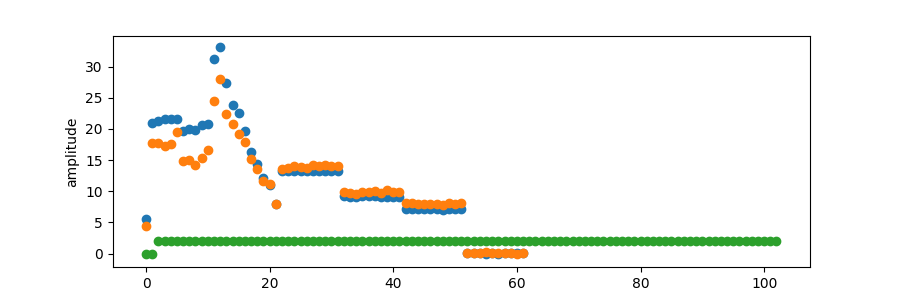

[Text(0, 0.5, 'amplitude')]

In [153]:
amp3_discharge = np.array([m3_.values[0] for m3_ in m3_discharge])
amp3_discharge2 = np.array([m3_.values[0] for m3_ in m3_discharge2])
scale = 1/np.mean(amp3_discharge2[3:])*2
_,ax = plt.subplots(figsize=(9,3), sharex=True)
ax.scatter(range(len(amp_discharge)),scale*amp3_discharge)
ax.scatter(range(len(amp_discharge)),amp_discharge/amp_discharge2[-50]*2)
ax.scatter(range(len(amp_discharge2)),scale*amp3_discharge2)
ax.set(ylabel='amplitude')

In [142]:
scale

1.056693944875291

### Fitting the 9kHz data

In [118]:
bdf_spin_9kHz = bdf_spin[-100:]
len(bdf_spin_9kHz)

100

In [137]:
fit_kwargs = {'A': 0, 'f': freq, 'phi': 0, 'A2': 2, 'f2': freq, 'delta_phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [-1,1], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': True}

##two estimators: amplitude and phase - fixed values
m3_spin_9kHz = [lc_i.find_mle_2sin(bdf_.x2*50000, bdf_.x3/3, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, 
                                   plot=False, suppress_print=True, **fit_kwargs) for bdf_ in bdf_spin_9kHz]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


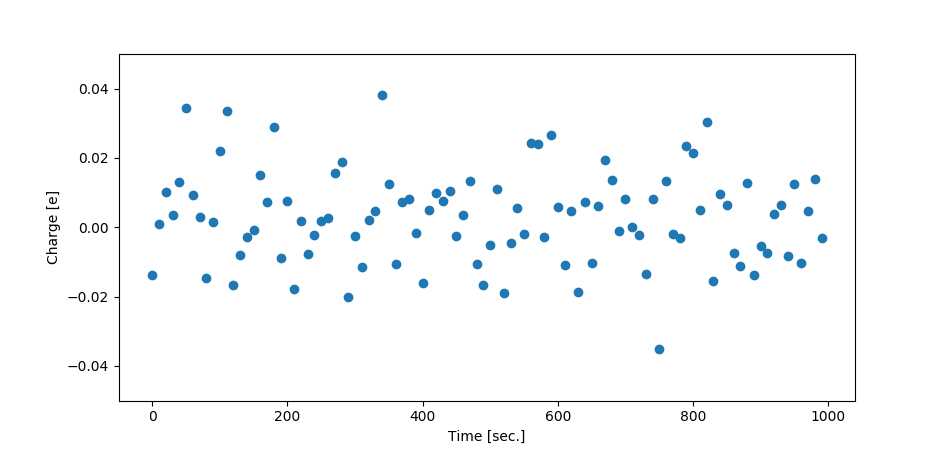

mean= 0.0028324297157115473
std= 0.013413555557101293


In [148]:
amp3_spin_9kHz = np.array([m3_.values[0] for m3_ in m3_spin_9kHz])
phase3_spin_9kHz = np.array([m3_.values[4] for m3_ in m3_spin_9kHz])
_,ax = plt.subplots(figsize=(9.5,4.5), sharex=True)
ax.scatter(np.arange(len(amp3_spin_9kHz))*10,scale*amp3_spin_9kHz)
ax.set(xlabel='Time [sec.]', ylabel='Charge [e]', ylim=(-0.05,0.05))
print('mean=', np.mean(scale*amp3_spin_9kHz))
print('std=', np.std(scale*amp3_spin_9kHz))

In [149]:
## validation with amplitudes only - fixed phase
fit_kwargs = {'A': 0, 'f': freq, 'phi': 0,
              'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [-1,1],
              'print_level': 0, 'fix_f': True, 'fix_phi': True}
m1_spin_9kHz = [lc_i.find_mle_sin(bdf_.x2*50000, drive_freq=freq, noise_rms=empirical_rms, bandwidth=10, plot=False,
                       suppress_print=True, **fit_kwargs) for bdf_ in bdf_spin_9kHz]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [150]:
scale2 = 1/amp_discharge2[-50]*2

<IPython.core.display.Javascript object>


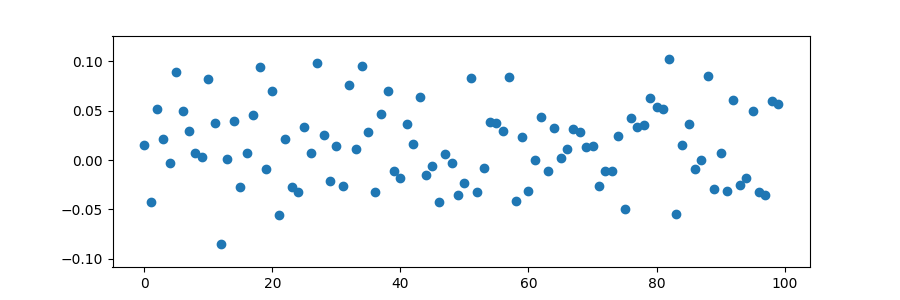

mean= 0.015779849062702356
std= 0.04035402550589259


In [151]:
amp_spin_9kHz = np.array([m1_.values[0] for m1_ in m1_spin_9kHz])
_,ax = plt.subplots(figsize=(9,3), sharex=True)
ax.scatter(range(len(amp_spin_9kHz)),scale2*amp_spin_9kHz)
print('mean=', np.mean(scale2*amp_spin_9kHz))
print('std=', np.std(scale2*amp_spin_9kHz))